# TP3 - Timer log

In [10]:
filename = "shakespear_artwork.txt"

### Count number of word with dict

In [11]:
def count_words_dict(filename):
    # On ouvre le fichier en lecture
    with open(filename, 'r') as file:
        # On crée un dictionnaire vide pour stocker les occurrences de chaque mot
        word_count = {}
        # On parcourt chaque ligne du fichier
        for line in file:
            # On sépare chaque ligne en mots
            words = line.split()
            # On parcourt chaque mot de la ligne
            for word in words:
                # Si le mot est déjà présent dans le dictionnaire, on incrémente sa valeur de 1
                if word in word_count:
                    word_count[word] += 1
                # Sinon, on l'ajoute au dictionnaire avec une valeur de 1
                else:
                    word_count[word] = 1
    # On retourne le dictionnaire
    return word_count

### Count number of word with Counter

In [12]:
from collections import Counter

def count_words_counter(filename):
    # On ouvre le fichier en lecture
    with open(filename, 'r') as file:
        # On lit le contenu du fichier et on le stocke dans une chaîne de caractères
        text = file.read()
        # On sépare la chaîne en mots
        words = text.split()
        # On utilise la classe Counter pour compter le nombre d'occurrences de chaque mot
        word_count = Counter(words)
    # On retourne le résultat sous forme de dictionnaire
    return dict(word_count)

### Check time

In [13]:
import timeit

# On mesure le temps d'exécution de la fonction count_words_dict
elapsed_time = timeit.timeit(lambda: count_words_dict(filename), number=1)
print(f'Temps d\'exécution de count_words_dict: {elapsed_time:.6f} secondes')

Temps d'exécution de count_words_dict: 0.345678 secondes


In [14]:
# On mesure le temps d'exécution de la fonction count_words_counter
elapsed_time = timeit.timeit(lambda: count_words_counter(filename), number=1)
print(f'Temps d\'exécution de count_words_counter: {elapsed_time:.6f} secondes')

Temps d'exécution de count_words_counter: 0.304972 secondes


In [15]:
def measure_execution_time(filename, times = 5):
    dict_times = []
    counter_times = []
    for i in range(times):
        dict_times.append(timeit.timeit(lambda: count_words_dict(filename), number=1))
        counter_times.append(timeit.timeit(lambda: count_words_counter(filename), number=1))
    return dict_times, counter_times

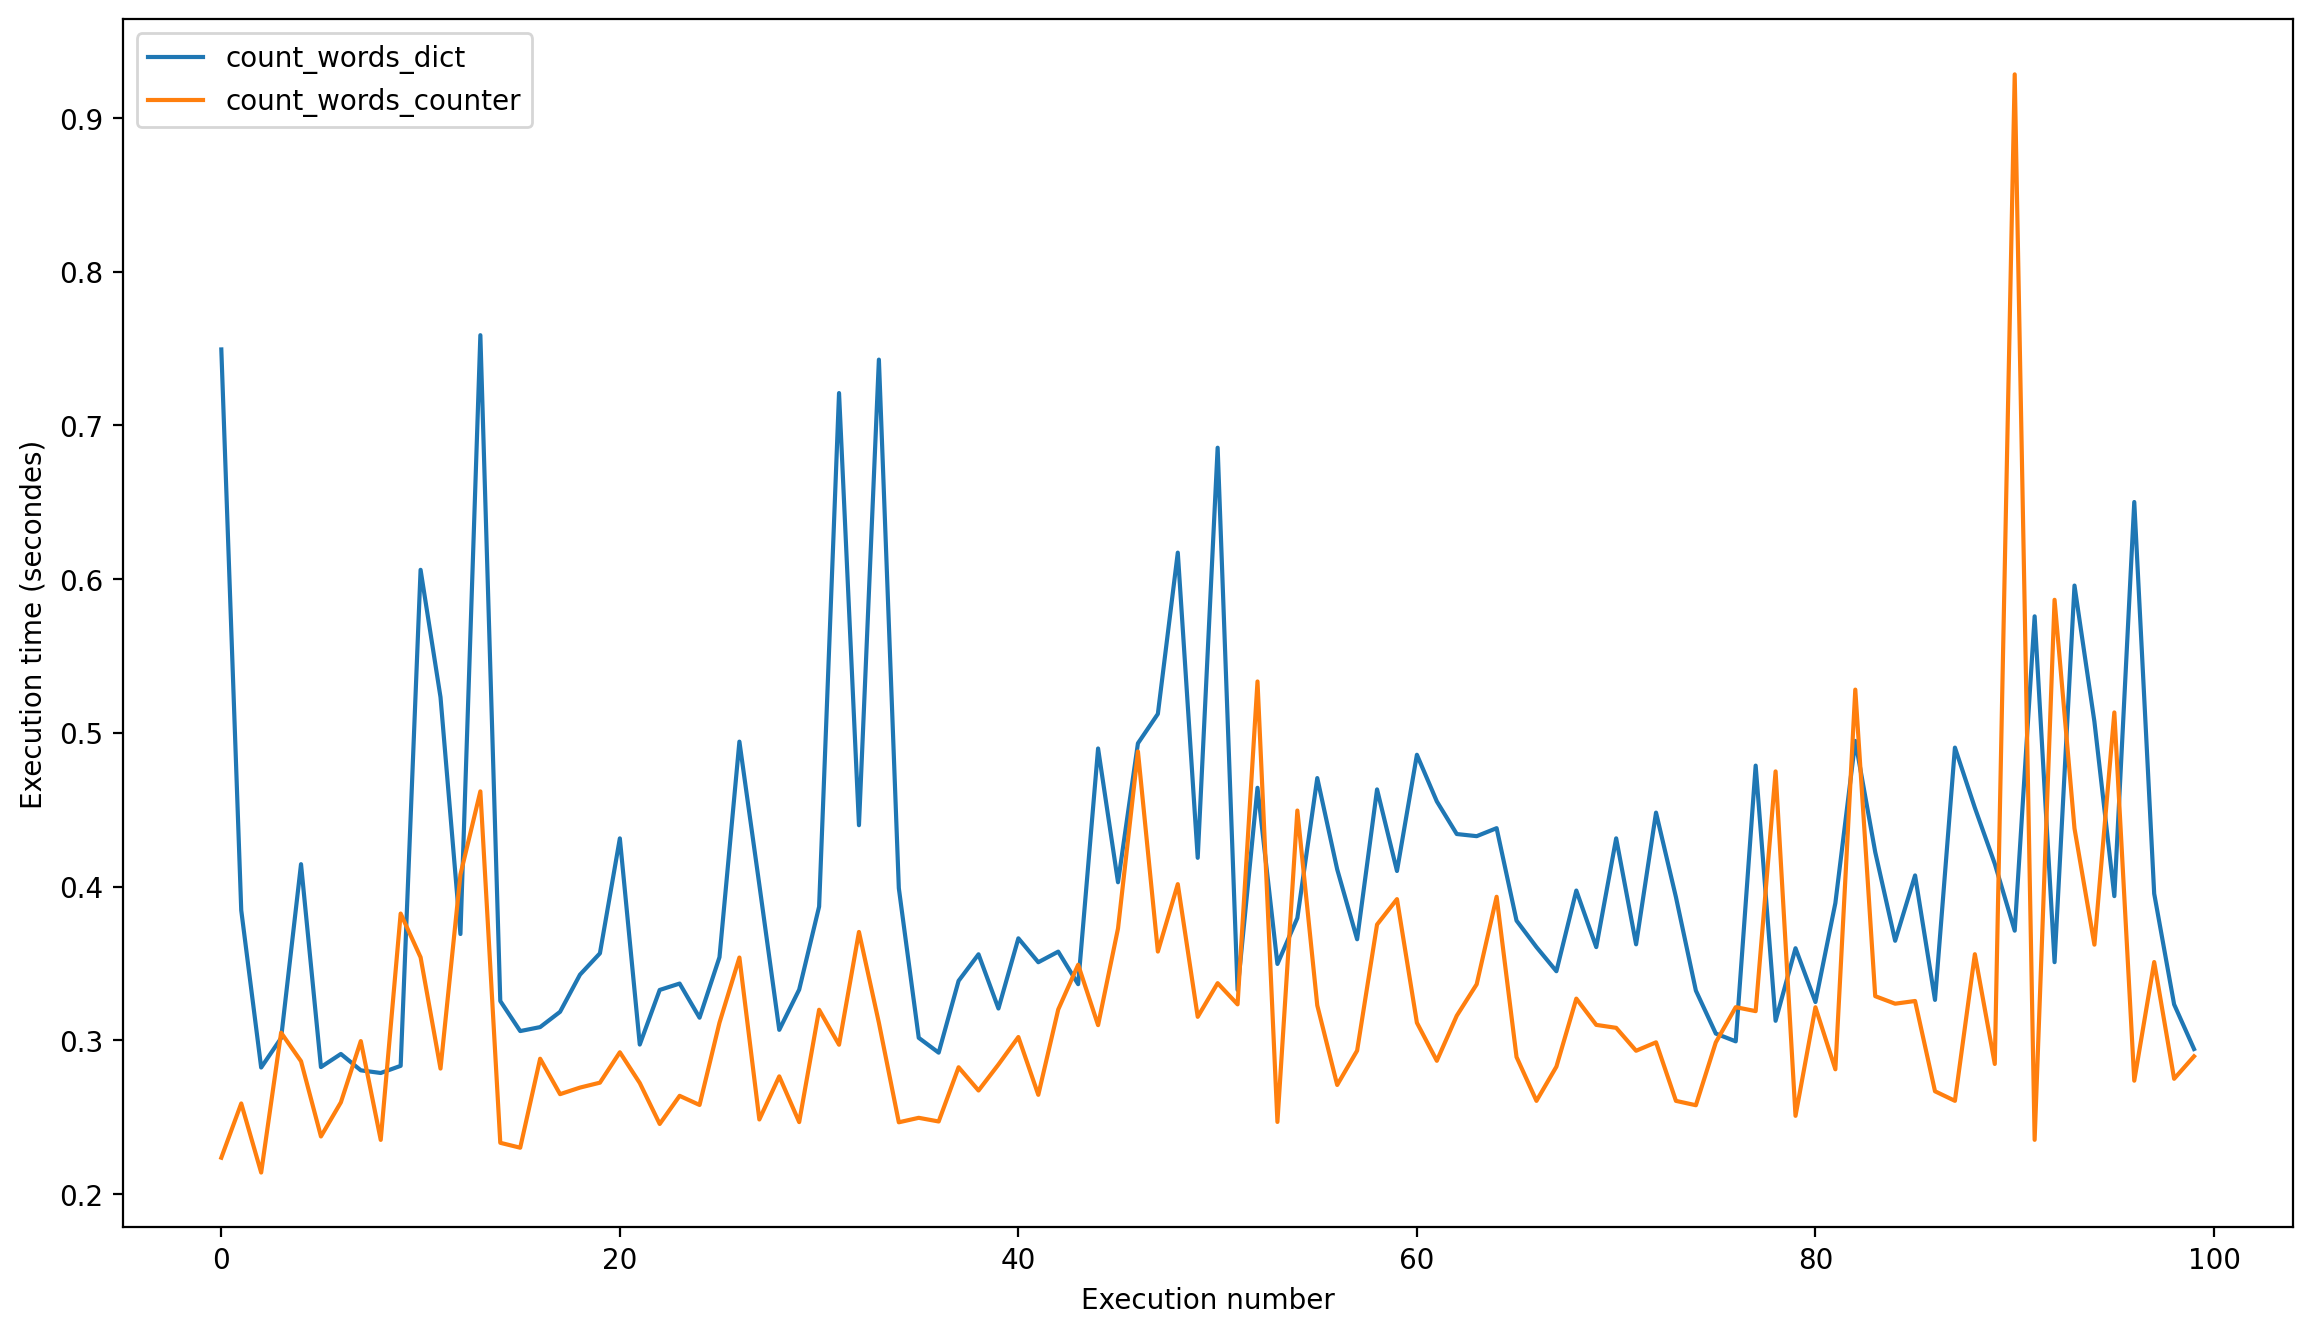

In [16]:
import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure

plt.figure(figsize=(14, 8), dpi=200)

# On mesure le temps d'exécution des deux fonctions
dict_times, counter_times = measure_execution_time(filename, times = 100)

# On crée un graphique en lignes
plt.plot(range(len(dict_times)), dict_times, label='count_words_dict')
plt.plot(range(len(counter_times)), counter_times, label='count_words_counter')


# On ajoute une légende et des labels aux axes
plt.legend(loc='upper left')
plt.xlabel('Execution number')
plt.ylabel('Execution time (secondes)')

# On affiche le graphique
plt.show()

In [17]:
print(dict_times)
print(counter_times)

[0.7494566490000025, 0.38456150500000064, 0.28227527399999985, 0.30140139999999604, 0.41457090200000124, 0.28256903500000163, 0.2910991240000058, 0.28043590699999754, 0.2787145630000012, 0.2833473139999967, 0.6060751859999982, 0.5232196420000008, 0.3691232800000037, 0.7587311739999976, 0.3255381660000012, 0.3059900210000066, 0.30856216699999806, 0.3185109670000017, 0.34268963699999944, 0.35656588199999817, 0.4313461559999965, 0.29719952199999966, 0.33274346700000024, 0.33689442600000064, 0.31468294699999433, 0.3540466440000074, 0.49429265899999564, 0.40119388400000844, 0.3067629949999997, 0.3329665669999997, 0.3869616780000058, 0.7210746420000049, 0.4399243630000029, 0.742839318999998, 0.39897466600000087, 0.3015867419999978, 0.2919311479999891, 0.338659241000002, 0.35593953900000486, 0.32065135899999575, 0.3663233409999975, 0.3507668259999974, 0.35766534299999364, 0.33648018299999194, 0.48983731699999566, 0.40280236799999614, 0.49320136500000444, 0.5123396769999999, 0.6172593189999986